In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [4749]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from IPython.display import display_html
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, KFold,GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold, TunedThresholdClassifierCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer, make_column_transformer

### Область работы 2 (поиск  модели .... )

In [4751]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [4752]:
def irq_mse(y_true, y_predict):
    delta = y_predict-y_true
    Q25 = np.quantile(delta, 0.25)
    Q75 = np.quantile(delta, 0.75)
    irq = Q75-Q25
    mask = (delta<(Q25-1.5*irq)) | (delta> (Q75+1.5*irq))
    if (mask.sum()==0):
        rez=0
    else: rez = -sum((delta[mask])**2) / mask.sum()
    return rez

In [4753]:
df = pd.read_csv(path_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [4754]:
df = df.drop_duplicates()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


In [4755]:
df.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.732886,3.537583
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.152500,0.709028
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [4756]:
df[df['y'] == 58.900000]

,carat,cut,color,clarity,depth,table,price,x,y,z
16230,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [4757]:
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])

In [4758]:
df.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.730864,3.536874
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.114259,0.694939
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,10.540000,8.060000


In [4759]:
print(df['cut'].unique())
print(df['color'].unique())
df['clarity'].unique()
df[(df['z'] == 0) & (df['x'] != 0) & (df['y'] != 0)]

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['I' 'E' 'D' 'H' 'F' 'G' 'J']


,carat,cut,color,clarity,depth,table,price,x,y,z
7928,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10418,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
11203,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
18359,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
33954,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
36549,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.0


In [4760]:
df['x'] = np.where((df['x'] == 0) & (df['z'] != 0) & (df['y'] != 0), (2 * df['z'] / df['depth'] - df['y']), df['x'])
df['y'] = np.where((df['y'] == 0) & (df['x'] != 0) & (df['z'] != 0), (2 * df['z'] / df['depth'] - df['x']), df['y'])
df['z'] = np.where((df['z'] == 0) & (df['x'] != 0) & (df['y'] != 0), (df['depth'] / 2) * (df['x'] + df['y']), df['z'])

df.iloc[7928]

carat       1.51
cut         Good
color          G
clarity      VS1
depth       63.1
table       60.0
price      13686
x           7.24
y            7.3
z           4.59
Name: 7929, dtype: object

<Axes: >

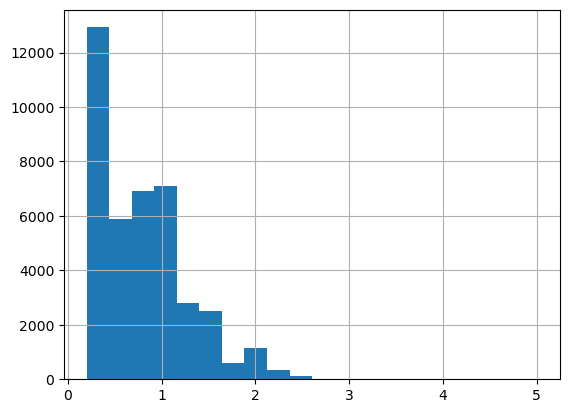

In [4761]:
df[df['carat'] > 3]
df['carat'].hist(bins=20)

In [4762]:
df = df[df['carat'] <= 4]
df = df[df['table'] <= 90]
df = df[df['x'] <= 10]
df = df[df['y'] <= 10]
df = df[df['z'] <= 7]

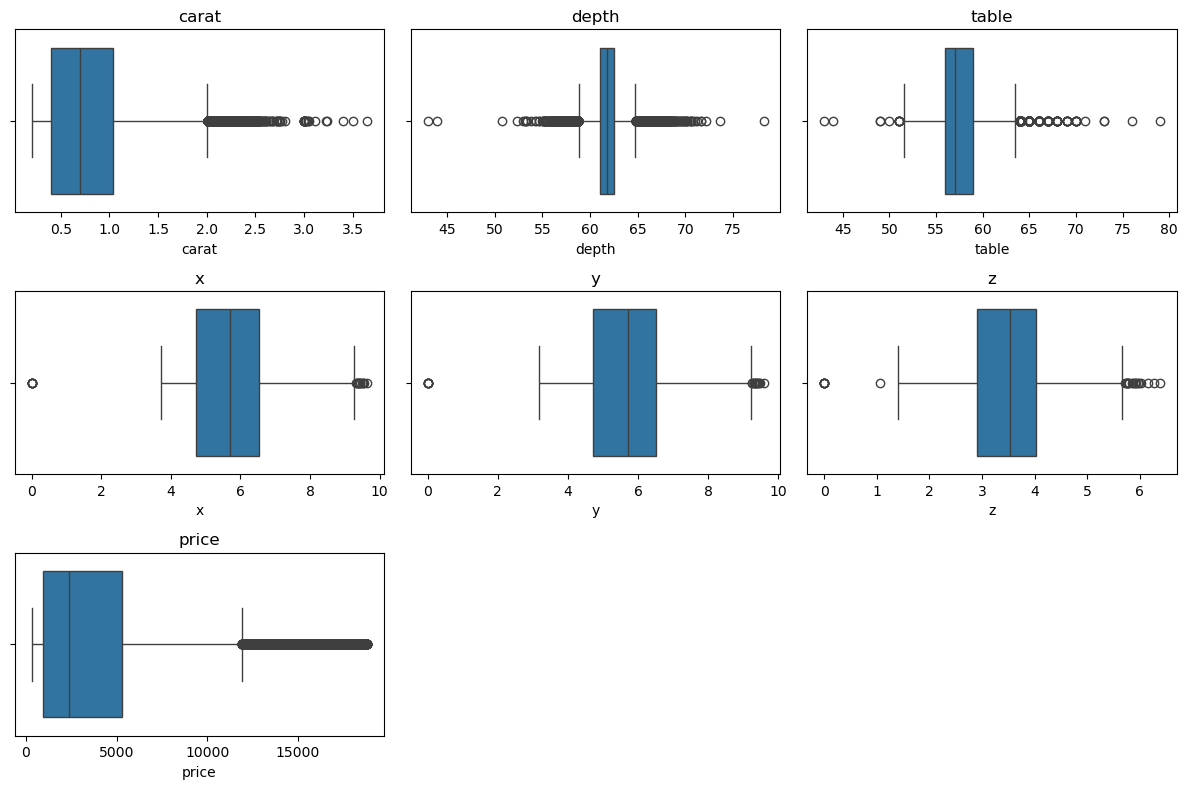

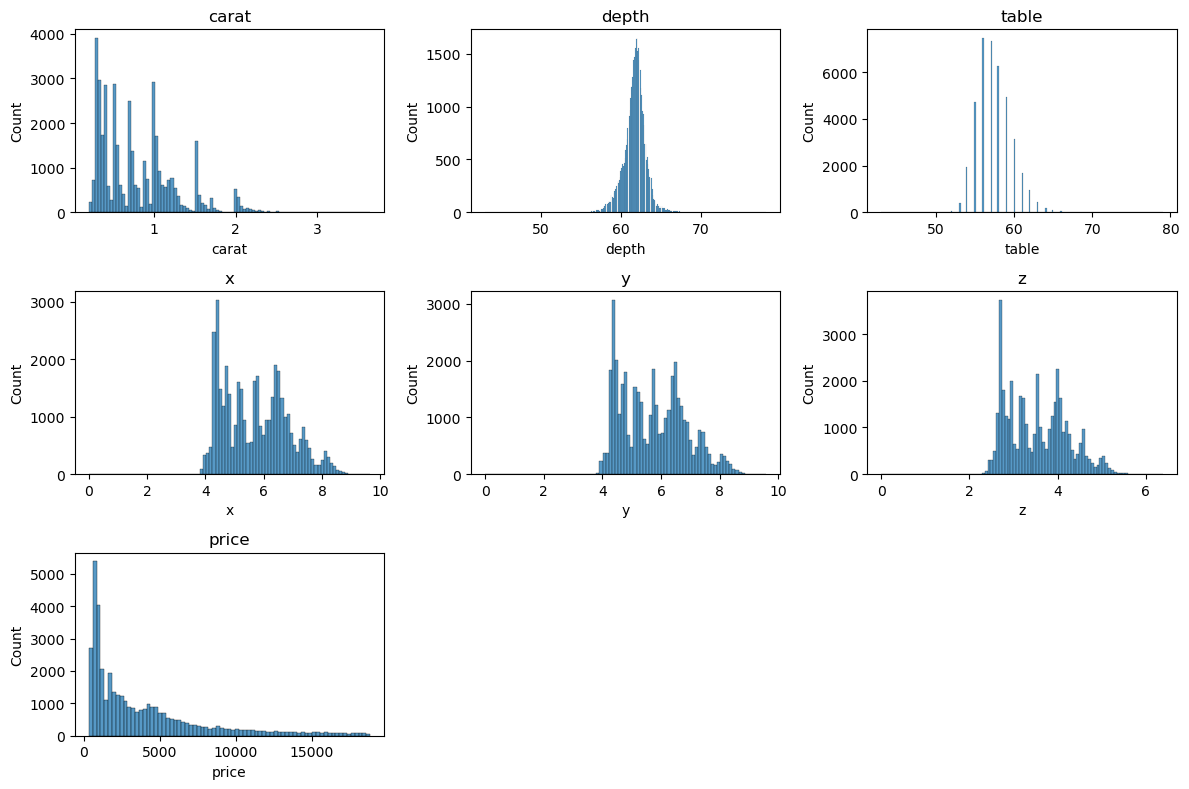

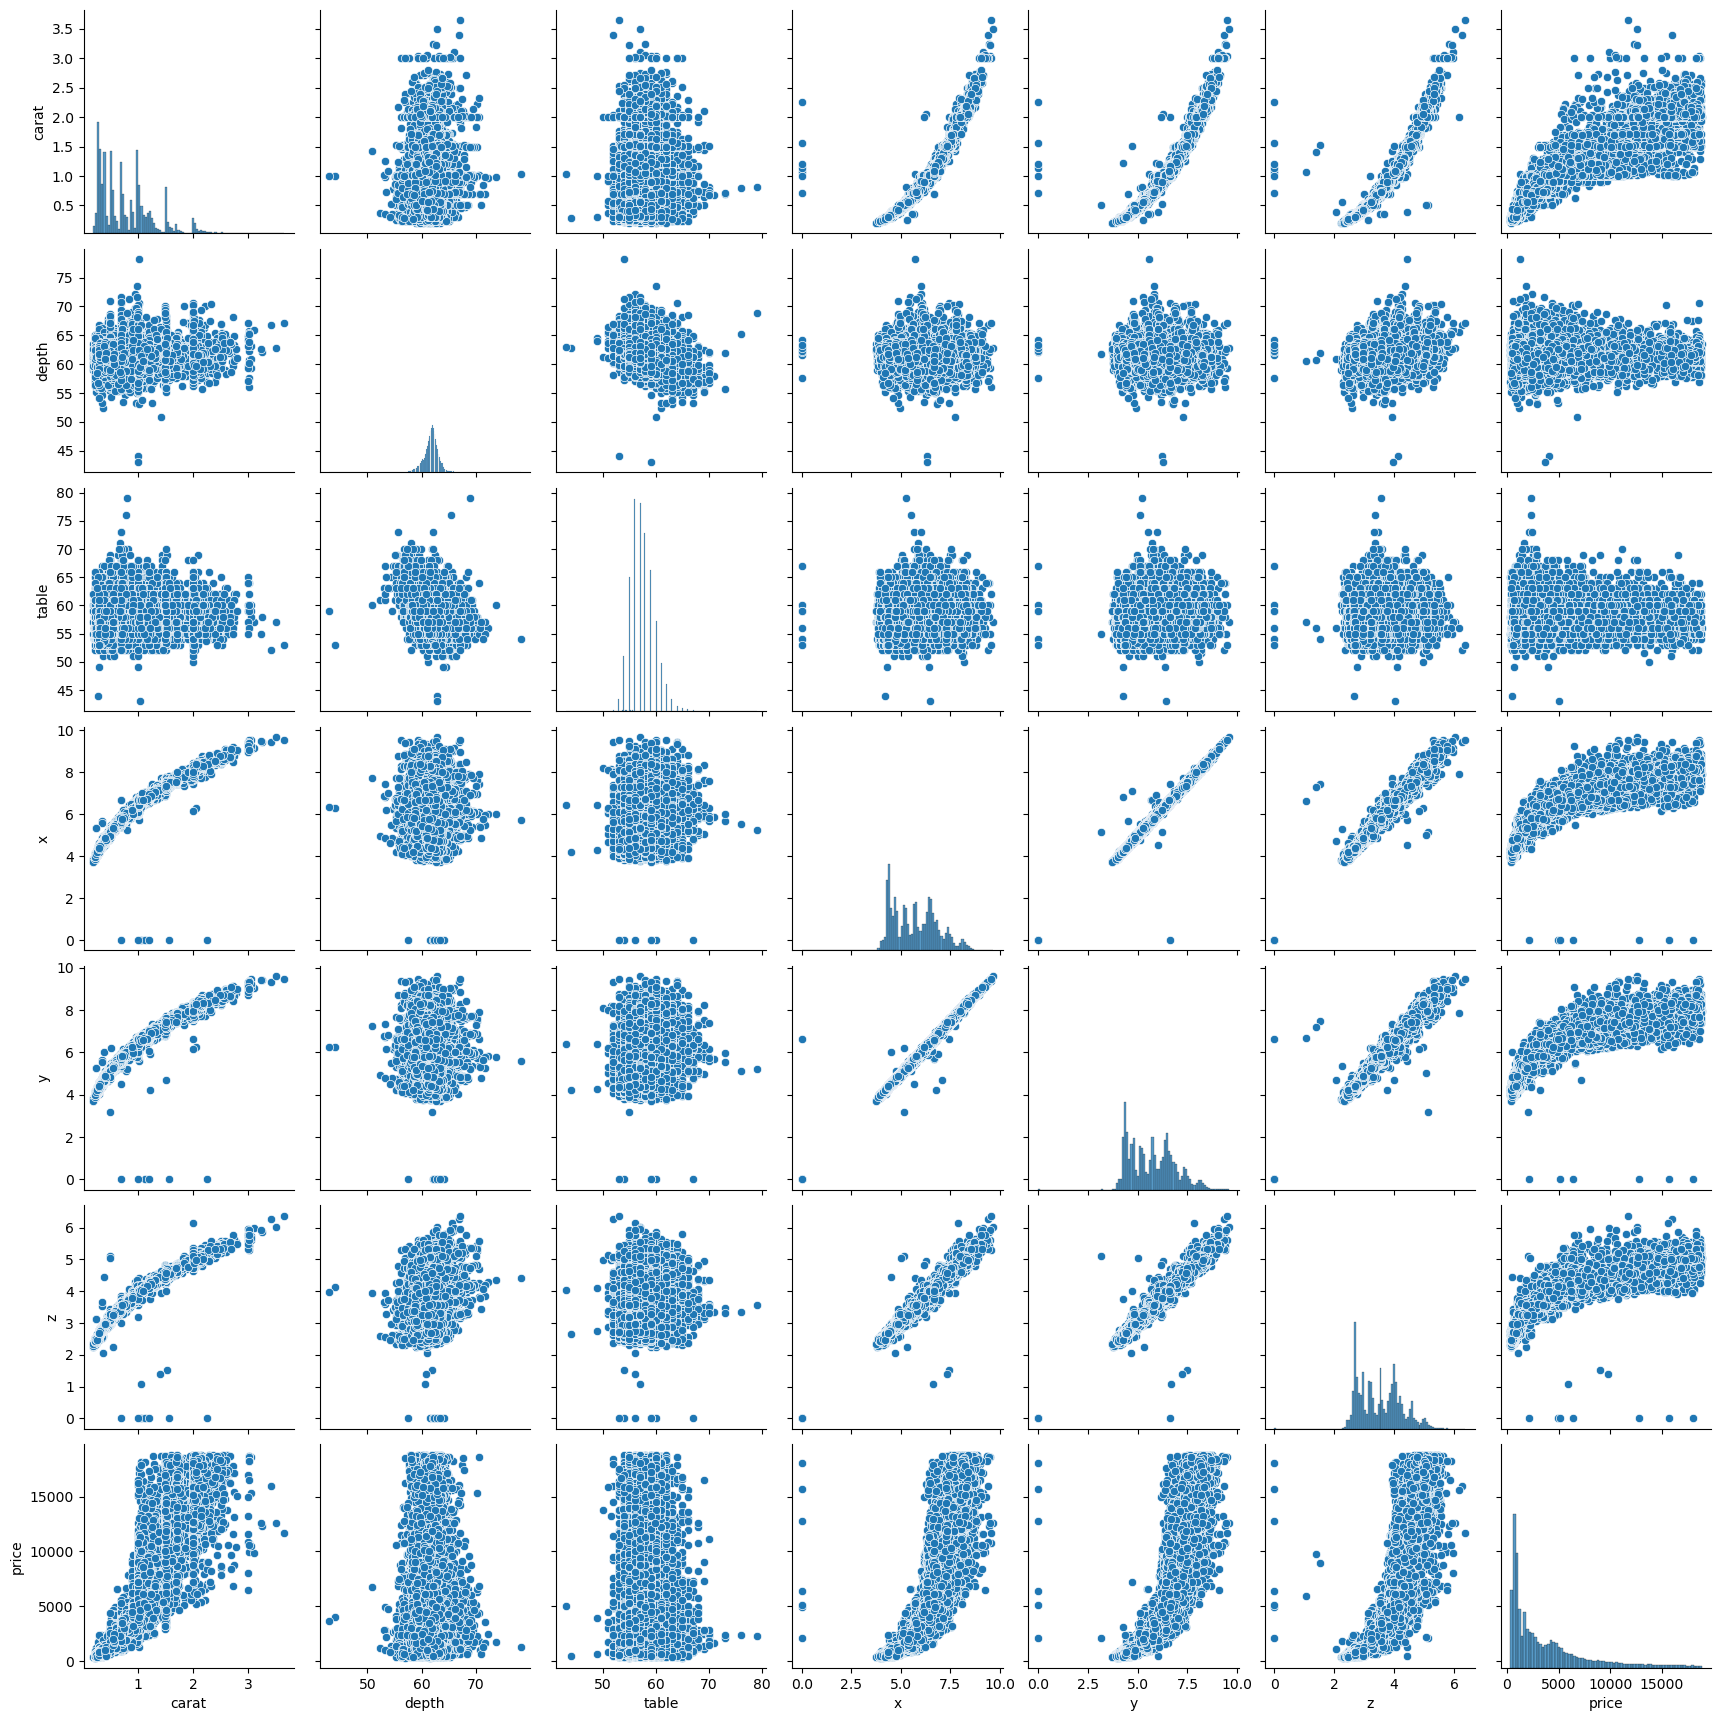

In [4763]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x=df[feature])
  plt.title(feature)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
  plt.subplot(3, 3, i+1)
  sns.histplot(x=df[feature])
  plt.title(feature)
plt.tight_layout()
plt.show()

sns.pairplot(df[numeric_features])
plt.show()

In [4764]:
#df = df.drop(columns = ['table' ,'depth'])

In [4765]:
axis_features = ['x','y','z']
num_features = ['carat']#,'depth','table']

y = np.array(df.price)
X = df.drop(columns=['price'])

X_train,X_test,y_train,y_test = train_test_split(X, y)# random_state = 1) 

In [4766]:
axis_transformer = Pipeline(steps=[
    ('missing_num', KNNImputer(missing_values = 0, n_neighbors=7)), #IterativeImputer(missing_values=0, max_iter=20)
    ('polynom', PolynomialFeatures(3,include_bias=False, interaction_only = True)),
    ('scaler', RobustScaler())])

In [4767]:
num = Pipeline(steps=[
 #   ('missing_num', KNNImputer(n_neighbors=7)),
    ('bin', KBinsDiscretizer(n_bins = 4, strategy = 'uniform', encode = 'onehot-dense')),
    ('scaler', StandardScaler())]) #RobustScaler()

In [4768]:
clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 
               'SI1':2, 'SI2':1, 'I1':0}
    }]

clarity_transformer = Pipeline(steps=[
  #  ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', RobustScaler())
    ])    

In [4769]:
color_map = [
  {'col': 'color',
   'mapping': {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}}
]
color_transformer = Pipeline(steps=[
  #  ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', RobustScaler()) #MinMaxScaler()
    ])    


In [4770]:
cut_map = [
  {'col': 'cut',
   'mapping': {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}}
]
cut_transformer = Pipeline(steps=[
  #  ('missing_num', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])   

In [4771]:
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),# убрать быстую разряженную 
        ("ordinal_map", clarity_transformer, ['clarity']),
        ("color_map", color_transformer, ['color']),
        ("cut_map", cut_transformer, ['cut'])
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  KNNImputer(missing_values=0,
                                                             n_neighbors=7)),
                                                 ('polynom',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False,
                                                                     interaction_only=True)),
                                                 ('scaler', RobustScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('bin',
                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                   n_bins=4,
                                                                   strategy='uniform'))...
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'color',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': D    6
E    5
F    4
G    3
H    2
I    1
J    0
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['color']),
                                ('cut_map',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cut'])])

,39559,28278,6512,26800,10411
axis_transformer__x,0.338798,-0.732240,-0.765027,0.284153,-0.508197
axis_transformer__y,0.364641,-0.729282,-0.756906,0.298343,-0.508287
axis_transformer__z,0.312500,-0.687500,-0.830357,0.285714,-0.455357
axis_transformer__x y,0.376921,-0.655054,-0.678422,0.309300,-0.473917
axis_transformer__x z,0.347983,-0.653911,-0.722386,0.301874,-0.463693
axis_transformer__y z,0.362057,-0.650585,-0.717483,0.309557,-0.461821
axis_transformer__x y z,0.385002,-0.587499,-0.627988,0.323505,-0.435452
num__carat_0.0,0.602588,0.602588,0.602588,0.602588,0.602588
num__carat_1.0,-0.537938,-0.537938,-0.537938,-0.537938,-0.537938
num__carat_2.0,-0.206841,-0.206841,-0.206841,-0.206841,-0.206841


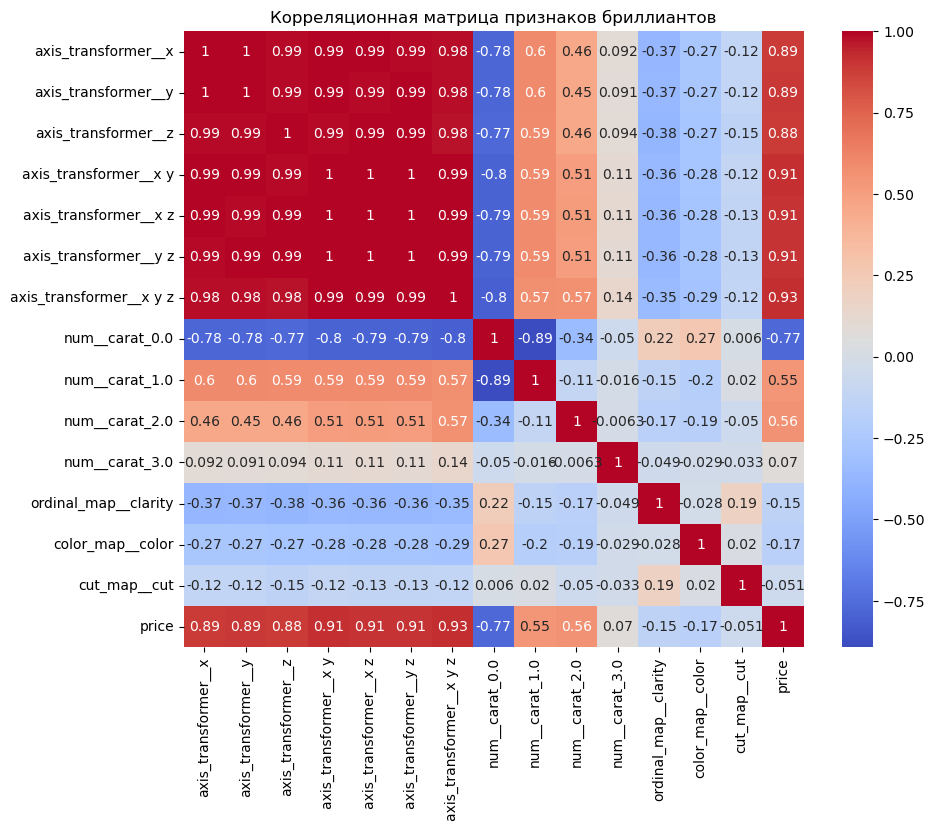

Корреляции с ценой:
axis_transformer__x        0.888034
axis_transformer__y        0.889423
axis_transformer__z        0.883060
axis_transformer__x y      0.911872
axis_transformer__x z      0.910214
axis_transformer__y z      0.911265
axis_transformer__x y z    0.925065
num__carat_0.0            -0.770905
num__carat_1.0             0.545255
num__carat_2.0             0.560454
num__carat_3.0             0.070363
ordinal_map__clarity      -0.148081
color_map__color          -0.171907
cut_map__cut              -0.051238
price                      1.000000
Name: price, dtype: float64


In [4772]:
corrt = ct
corrt['price'] = df['price']
correlation_matrix = ct.corr()

# Визуализируйте корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков бриллиантов")
plt.show()

# Выведите корреляции с ценой
print("Корреляции с ценой:")
print(correlation_matrix["price"])

In [4773]:
model_3 = Pipeline(steps=[
  ('preproc', CT),
  ('estimator', KNeighborsRegressor())
])
cv = RepeatedKFold(n_splits=5, n_repeats = 5)
n_neighbors = [7, 8]
weights = ['distance', 'uniform'] 
metric = ['euclidean', 'manhattan']
p = [1, 2]
param_grid = [
  {
    'estimator__n_neighbors': n_neighbors,
 #   'estimator__weights': weights,
 #   'estimator__metric': metric,
    'estimator__p': p,
  }
]
grid = GridSearchCV(model_3, param_grid, return_train_score=True, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1) 
grid.fit(X_train, y_train)
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result.head(20)

In [4821]:
knn_regressor = Pipeline(steps=[
  ('preproc', CT),
  ('estimator', KNeighborsRegressor(n_neighbors=7, weights='distance', p=1, metric='euclidean'))
])
knn_regressor.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('axis_transformer',
                                                  Pipeline(steps=[('missing_num',
                                                                   KNNImputer(missing_values=0,
                                                                              n_neighbors=7)),
                                                                  ('polynom',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False,
                                                                                      interaction_only=True)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['x', 'y', 'z']),
                                                 ('num',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_...
E    5
F    4
G    3
H    2
I    1
J    0
dtype: int64}])),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['color']),
                                                 ('cut_map',
                                                  Pipeline(steps=[('ce',
                                                                   OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cut'])])),
                ('estimator',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=7, p=1,
                                     weights='distance'))])

In [4822]:
y_knn_pred = knn_regressor.predict(X_test)

In [4823]:
print(mean_squared_error(y_test, y_knn_pred))
irq_mse(y_test, y_knn_pred)

331994.9494594225


-1681749.1668351342

In [4777]:
model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', KNeighborsRegressor(n_neighbors=7, weights='distance', p=1, metric='euclidean'))
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="uniform")
)

model_target.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('axis_transformer',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        KNNImputer(missing_values=0,
                                                                                                                   n_neighbors=7)),
                                                                                                       ('polynom',
                                                                                                        PolynomialFeatures(degree=3,
                                                                                                                           include_bias=False,
                                                                                                                           interaction_only=True)),
                                                                                                       ('scaler',
                                                                                                        RobustScaler())]),
                                                                                       ['x',
                                                                                        'y',
                                                                                        'z']),
                                                                                      ('num',
                                                                                       Pipeline(steps=[('bin',
                                                                                                        KBin...
                                                                                                       ('scaler',
                                                                                                        RobustScaler())]),
                                                                                       ['color']),
                                                                                      ('cut_map',
                                                                                       Pipeline(steps=[('ce',
                                                                                                        OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                                                       ('scaler',
                                                                                                        MinMaxScaler())]),
                                                                                       ['cut'])])),
                                                     ('estimator',
                                                      KNeighborsRegressor(metric='euclidean',
                                                                          n_neighbors=7,
                                                                          p=1,
                                                                          weights='distance'))]),
                           transformer=QuantileTransformer())

In [4778]:
y_mod_tar1 = model_target.predict(X_test)
irq_mse(y_test, y_mod_tar1)

-1698405.9144780964

In [4779]:
model_target2 =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', KNeighborsRegressor(n_neighbors=7, weights='distance', p=1, metric='euclidean'))
                            ]),
                transformer=PowerTransformer()
)

model_target2.fit(X_train, y_train)
y_mod_tar2 = model_target2.predict(X_test)
irq_mse(y_test, y_mod_tar2)

-1682657.359453018

In [4780]:
print(irq_mse(y_test, y_mod_tar1) > irq_mse(y_test, y_knn_pred))
irq_mse(y_test, y_mod_tar2) > irq_mse(y_test, y_knn_pred)

False


False

In [4781]:
knn_regressor2 = Pipeline(steps=[
  ('preproc', CT),
  ('estimator', KNeighborsRegressor(n_neighbors=5, weights='distance', p=10, metric='euclidean'))
])
knn_regressor2.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('axis_transformer',
                                                  Pipeline(steps=[('missing_num',
                                                                   KNNImputer(missing_values=0,
                                                                              n_neighbors=7)),
                                                                  ('polynom',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False,
                                                                                      interaction_only=True)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['x', 'y', 'z']),
                                                 ('num',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_...
                                                                                            'mapping': D    6
E    5
F    4
G    3
H    2
I    1
J    0
dtype: int64}])),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['color']),
                                                 ('cut_map',
                                                  Pipeline(steps=[('ce',
                                                                   OrdinalEncoder(mapping=[{'col': 'cut',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': Ideal        4
Premium      3
Very Good    2
Good         1
Fair         0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cut'])])),
                ('estimator',
                 KNeighborsRegressor(metric='euclidean', p=10,
                                     weights='distance'))])

In [4782]:
y_knn_pred2 = knn_regressor2.predict(X_test)

In [4783]:
irq_mse(y_test, y_knn_pred2)

-1723896.9472029384

In [4784]:
irq_mse(y_test, y_knn_pred)

-1681749.1668351342